# **Modeling Data Using a Graph.**

In this example we explore using NetworkX to build graphs based on related data. Below are some examples that illustrate how to build a graph using this package. 

Run these examples and confirm that you have NetworkX correctly installed. Then complete questions 1 - 4 below. 

It is recommended that you upload and run this notebook on [Colab](https://colab.research.google.com/)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)



In [3]:
# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}


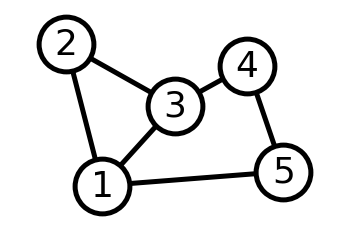

In [4]:
nx.draw_networkx(G, pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# Now try building a directed Graph 

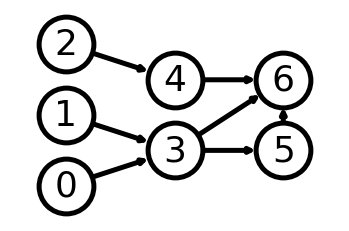

In [5]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

**Modeling Twitter Network.**

In this exercise we will model and analyze example Twitter social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph. 

Using the following data table below complete the stated questions.


- Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
- Wei follows Dan, Bob, and Sam
- Bob follows Jane, Wei, and Tiana
- Tiana follows Jane and Juan
- Sally follows Bob
- Jane follows Jane and Wei
- Juan follows Sally and Jane 
- Sam follows Jane 

NOTE: If you have any questions about syntax or function names, search the docs. There is a search bar in the upper right of this page:

https://networkx.org/documentation/stable/reference/index.html







## Question 1.

Would you use a undirected graph or a directed graph to model this data? Explain.

**I would use a directed graph to model the data since there is a directional relationship between the data. The direction is dicated by who follows who.**

## Question 2.

Create this graph using NetworkX and plot the resulting graph. 

In [6]:
G = nx.DiGraph()
G.add_edges_from(
    [('Dan', 'Jane'), ('Dan', 'Bob'), ('Dan', 'Sally'), ('Dan', 'Sam'), ('Dan','Tiana'),
                      ('Dan', 'Juan'), ('Dan', 'Wei'),    
     ('Wei', 'Dan'), ('Wei', 'Bob'), ('Wei', 'Sam'),
     ('Bob', 'Jane') , ('Bob', 'Wei'), ('Bob', 'Tiana'),
     ('Tiana', 'Jane'), ('Tiana', 'Juan'),
     ('Sally', 'Bob'),
     ('Jane', 'Jane'), ('Jane', 'Wei'),
     ('Juan', 'Sally'), ('Juan', 'Jane'),
     ('Sam', 'Jane')
     
     ])

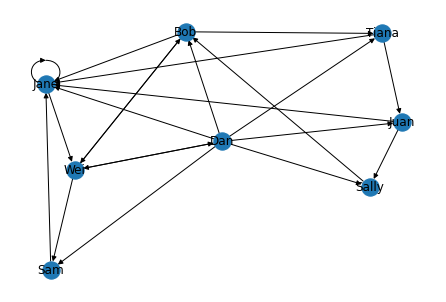

In [7]:
nx.draw(G,with_labels = True)
plt.show()

## Question 3.

Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why? 

**The graph measure I would compute is betweeenness centrality. This is because the nodes with the highest betweenness has the highest control over the information passing between nodes.**

## Question 4.

Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

In [8]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Wei', 'Jane', 'Bob', 'Dan', 'Sally']

**Wei had the highest betweenness measure and was thus the biggest social influencer.**

In [9]:
# Load the facebook_combined.txt data file
#facebook_combined.txt 
#from google.colab import files
#uploaded = files.upload()

In [10]:
# Read in graph data from facebook data txt file. 
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


(-0.8890820187330246,
 1.1795055311918259,
 -0.49199426755309106,
 0.5202564357221127)

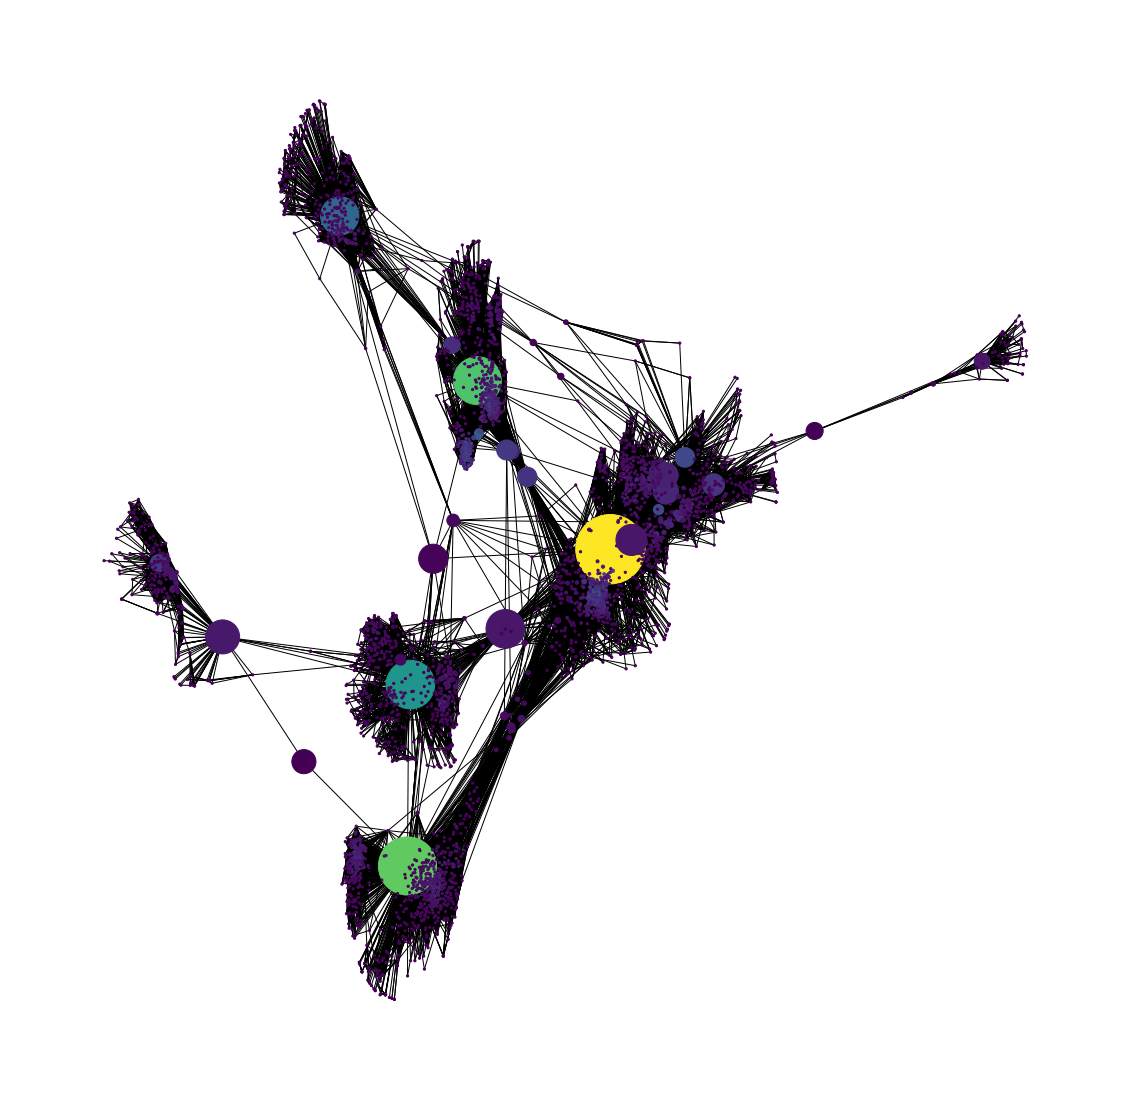

In [11]:
# Compute measures of centrality and degree for the nodes. These attributes can 
# be used to help analyze the graph. Then the graph is plotted and color and size
# of the nodes are used to indicate size and betweeness, respectively. (Note: This
# is a large data set and may take 5+ minutes to run.)

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')


# Nodes with the highest betweeness

In [12]:
# Identify the top 5 nodes with highest betweeness measures. 
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]